# Introduction to Temperature Options

It is estimated that nearly 30 percent of the US economy is directly affected by the weather [1,3].

Weather derivatives are financial instruments that can be used to reduce risk associated with adverse weather conditions:
- Temperature
- Rain
- Snow
- Frost

The first weather derivative was traded Over-the-counter OTC in July 1996 when Aquila Energy structured a dual-commodity hedge for Consolidated Edison Co.
They have continued to trade OTC since 1997 and as the market grew, the Chicago Mercangile Exchange CME introducted exchange traded weather futures and options from 22-Sep 1999.

![trade](volume_trade.png)

## Terminology of Degree Days

Temperature data is readily available, free of charge for many meteorological stations across the world. The information is given in the form of a high and low every day.

- High – max temperature of the day: $T_{n}^{max}$
- Min – min temperature of the day: $T_{n}^{min}$
- Avg – avg temperature of the day: $T_{n}$
$$T_{n}=\frac{T_{n}^{max}+T_{n}^{min}}{2}$$



Although this definition is not exactly the intuitive notation of what average temperatures are for a given day, this is the standard definition that is used for definind heating degree days (HDD) and cooling degree days (CDD).

On each day (period) $n \in \mathbb{N}$:
- the heating degree days is defined as $HDD_{n}=(65−T_{n})^{+}$
- the cooling degree days is defined as $CDD_{n}=(T_{n}–65)^{+}$


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
temps = np.random.normal(65,5,92)
HDD_p = np.maximum(0, 65-temps)
CDD_p = np.maximum(0, temps-65)
df = pd.DataFrame(np.array([temps, HDD_p, CDD_p]).T, index=range(1,len(temps)+1), columns=['Avg Temp', 'HDD', 'CDD'])
df.loc['Total'] = pd.Series(df[['HDD', 'CDD']].sum())
round(df,2)

,Avg Temp,HDD,CDD
1,77.90,0.00,12.90
2,70.80,0.00,5.80
3,69.25,0.00,4.25
4,65.30,0.00,0.30
5,66.36,0.00,1.36
...,...,...,...
89,65.71,0.00,0.71
90,73.74,0.00,8.74
91,70.24,0.00,5.24
92,64.76,0.24,0.00


## Traded Products

Futures contracts on monthly cumulative degree days have been introduced by the [CME](https://www.cmegroup.com/trading/weather/).

But traded volumes are [small](https://www.cmegroup.com/daily_bulletin/current/Section24_Weather_Futures_And_Options.pdf).

![volume](monthly_volume.jpg)

So we will be considering contracts that trade in the OTC market. We standardise our notation to refer to other reference temperatures instead of only 65 degrees fahrenheit.

For a day $n \in \mathbb{N}$:

- $HDD_{n}=(T_{ref}-T_{n})^{+}$
- $CDD_{n}=(T_{n}-T_{ref})^{+}$

Here the buyer of an option with receive an amount:

$ξ=f(DD)$

payoff function $f$ is computed on the cumulative index over a period $P$:

- heating degree seasons $DD=H_{n}=HDD^{N}=\sum^{N}_{n}HDD_{n}$
- cooling degree seasons $DD=C_{n}=CDD^{N}=\sum^{N}_{n}CDD_{n}$

#### Typical Seasons OTC

- CDD season: 15-May to 15-Sep
- HDD season: 15-Dec(Nov) to 15-Mar

We go on to set a few constants similar to the industry standards.

In [2]:
alpha = 5000
beta = 5000
Kc = 750
Kp = 550
C = 5e5
F = 1e6
DD = np.arange(200,1000,10)
call = np.minimum(alpha*np.maximum(DD-Kc,0), C)
put = np.minimum(alpha*np.maximum(Kp-DD,0), F)
collar = call - put

## Popular Payoff Functions [4]

#### Call with Cap

$$ξ=min\{α(DD–K)^{+},C\}$$

where:
- payoff rates $α$ is commonly US\\$2,500 or US\\$5,000 [4]
- hile caps $C$ is commonly US\\$500,000 or US\\$1,000,000 [4]

Example: cruises suffer with reduced summer sales when there are extremely hot spring weathe. to hedge risk the company buys an out of the money call on Spring CDD’s, possibly with a cap because the business will sell a minimum number of cruises no matter what.

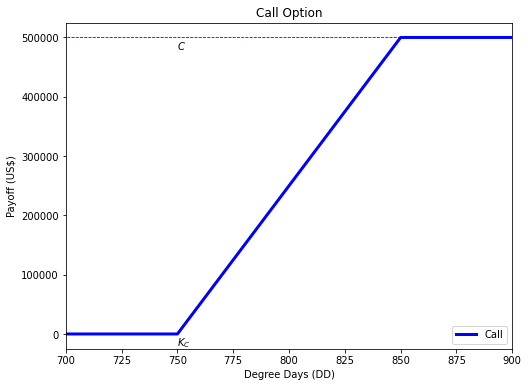

In [3]:
fig = plt.figure(figsize=(8,6))
plt.plot(DD, call, 'b', linewidth=3, label='Call')
plt.plot([200,1000],[C,C], 'b--', linewidth=0.8)
plt.text(750, C-.2e5, r'$C$')
plt.text(Kc, -.2e5, r'$K_C$')
plt.xlim([700,900])
plt.title('Call Option')
plt.xlabel('Degree Days (DD)')
plt.ylabel("Payoff (US$)")
plt.legend()
plt.show()

#### Put with Floor

$$ξ=min\{α(K–DD)^{+},F\}$$

Example: To hedge risk that a warm winter decreases sales revenue from a gas company, they may choose to buy a put on HDD’s over the winter season

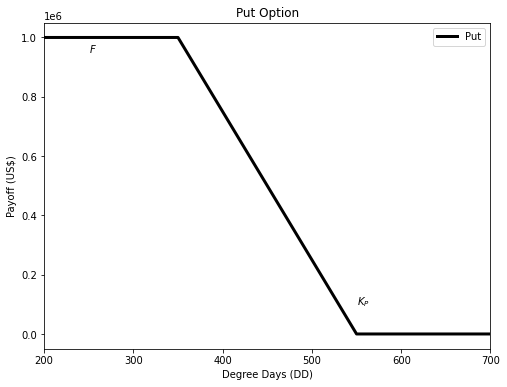

In [4]:
fig = plt.figure(figsize=(8,6))
plt.plot(DD, put, 'k', linewidth=3, label='Put')
plt.text(250, F-5e4, r'$F$')
plt.text(Kp, +.1e6, r'$K_P$')
plt.xlim([200,700])
plt.title('Put Option')
plt.xlabel('Degree Days (DD)')
plt.ylabel("Payoff (US$)")
plt.legend()
plt.show()

#### Collar

$$ξ=min\{α(DD–K_{1})^{+},C\}–min\{β(K_{2}–DD)^{+},F\}$$

Example: to hedge revenues against a mild winter, a gas company could enter into a zero dollar collar contract (no up-front cost) that pays the writer if the winter is cold and receives payment if the winter is warm.

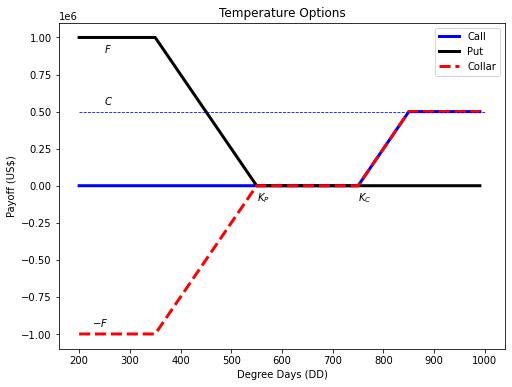

In [5]:
fig = plt.figure(figsize=(8,6))
plt.plot(DD, call, 'b', linewidth=3, label='Call')
plt.plot(DD, put, 'k', linewidth=3, label='Put')
plt.plot(DD, collar, 'r--', linewidth=3, label='Collar')
plt.plot([200,1000],[C,C], 'b--', linewidth=0.8)
plt.text(250, C+.5e5, r'$C$')
plt.text(250, F-1e5, r'$F$')
plt.text(225, -F+.5e5, r'$-F$')
plt.text(Kc, -.1e6, r'$K_C$')
plt.text(Kp, -.1e6, r'$K_P$')
plt.title('Temperature Options')
plt.xlabel('Degree Days (DD)')
plt.ylabel("Payoff (US$)")
plt.legend()
plt.show()

### References:

[1] Weather Futures and Options, CME Group Inc, 2021 See: [Link](https://www.cmegroup.com/trading/weather/files/weather-fact-card.pdf).

[2] Managing Climate Risk with CME Group Weather Futures and Options Dominic Sutton-Vermeule, 20-Jan 2021 See: [Link](https://www.cmegroup.com/education/articles-and-reports/managing-climate-risk-with-cme-group-weather-futures-and-options.html).

[3] MANAGING CLIMATE RISK IN THE U.S. FINANCIAL SYSTEM, ISBN: 978-0-578-74841-2, 2020. See: [Link](https://www.cftc.gov/sites/default/files/2020-09/9-9-20%20Report%20of%20the%20Subcommittee%20on%20Climate-Related%20Market%20Risk%20-%20Managing%20Climate%20Risk%20in%20the%20U.S.%20Financial%20System%20for%20posting.pdf).

[4] Statistical Analysis of Financial Data in R (Rene Carmona, 2014)